# RC FILTERS
Ryan Coyne
## Numerically calculating the response of an RC filter network

There are two ways to compute the resonse of a circuit that contains resistors, capacitors, and inductors. You can do the analysis with complex impedances and then analyze the circuit response with a Fast Fourier Transform (this notebook), or you can solve the Ordinary Differential Equation (ODE) directly, see [Solving_RC_low_pass_with_ODE](https://github.com/mholtrop/Phys605/blob/master/Python/Signal/Solving_RC_low_pass_with_ODE.ipynb) 

In the first method, we use the impedance definition for a capacitor (or an inductor) to work out the response of an RC (or RL or RLC) network. The initial math is similar to the resistor networks, but now instead of R we have Z, and complicating things a little, Z is complex. The frequency response, in a Bode plot, can be worked out using the FFT tools of Python's SciPy.

First, the simplest low pass filter is a resistor and a capacitor to ground. Like this:
<img src="rc_filter_circuit.pdf" alt="Low Pass RC Filter" style="width: 200px;"/>
For the analysis of this circuit, we first need to remember that for a resistor $Z_R = R$, and for a capacitor $Z_C = \frac{-j}{\omega C}$. The circuit forms just a voltage divider, but now with a capacitor replacing the second resistor. If the input to our circuit is a pure sinusoidal signal, then we can compute the output voltage as:
$$ V_{out}(t) = V_{in}(t) \left(\frac{Z_C}{Z_R + Z_C} \right)= V_{in}(t)\left(\frac{-j/\omega C}{R- j/\omega C} \right) = V_{in}(t)\left(\frac{1}{jR\omega C +1} \right)  $$
We could simplify this statement, or just enter it as a Python formula as is.

To do this we need to first learn about complex numbers in Python. Actually, they are really easy, if we use Numpy (or Scipy). The complex number is just $\sqrt{-1} = 1j$. You enter a complex number as: `1j` or `0.123+0.4j`.

#### Question: 
Check that the square of $i$ is indeed -1 in Python!.

In [2]:
1j**2

(-1+0j)

In [3]:
# Execute these startup lines so that Numpy and Matplotlib are available to you.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

We can now define the RC circuit as a function of the frequency, where will use $f=\omega/2\pi$, and for simplicity we choose $V_{in}=1$. 

#### Task

1. Write a function called Filter, that accepts the arguments (f,R,C) and returns the output amplitude for a low pass filter, vout.

In [4]:
# Fill in the code for the Filter function for a low pass filter.
# 
# Points = 10
#
def Filter(f,R,C):                     
    """Filter function that corresponds to the low pass RC filter."""
    out = 1/(2*np.pi*R*f*C*1j + 1)
    return out
#
# Your code goes here:

In [5]:
# Tests for your function by running these statements. Any error indicates your function
# does not have the expected output.
#
assert np.abs(Filter(100., 1000., 1e-9) - (0.99999960-0.000628318j)) < 1E-6
assert np.abs(Filter(10.e3, 2000., 10E-9) - (0.3877266-0.48723166j))  < 1E-6
assert np.abs(np.imag(Filter(10.e3, 2000., 10E-9)) + 0.4872316614323186) < 1E-6

## Making Gain Plots

We now can plot the gain of our circuit (actially attenuation since we will find the gain is less than 1) for an input signal versus frequency. Since the function assumes $V_{in} = 1$ V, the absolute value (`np.abs()`) of the output of our function is equal to the attentuation, (since $G = V_{out}/V_{in}$). 

1. For R= 1kΩ and C=1µF,  make a plot of the gain for this circuit versus frequency from 10 Hz to 10kHz. Make this a semi log plot, where the x axis is logarithmic, but the y-axis is linear.
   1. This *should* look like the plot created with an AC sweep simulation. You can find one here:
       * Partsim https://www.partsim.com/simulator#66937.
       * SystemVision: https://www.systemvision.com/groups/mauriks-workspace/designs/passive-low-pass-filter-0
       * MultiSim Live: https://www.multisim.com/content/PLitYWAZXLxTrrH6zQfsXb/passive-low-pass-filter/open/
3. Make sure you label your plot, and you label your axes.
4. Draw a red vertical line for the cutoff frequency for this filter: 

$$F_{cut} = \frac{1}{2\pi R C}$$

5. Also make a plot of the *phase* of the signal versus frequency (same scale). The phase is equal to the angle of the imaginary number of our function.
6. Make sure you label your plot, and you label your axes.
7. Draw a red vertical line for the cutoff frequency for this filter

c:\Users\coyne\.conda\envs\physics\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\coyne\.conda\envs\physics\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\coyne\.conda\envs\physics\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


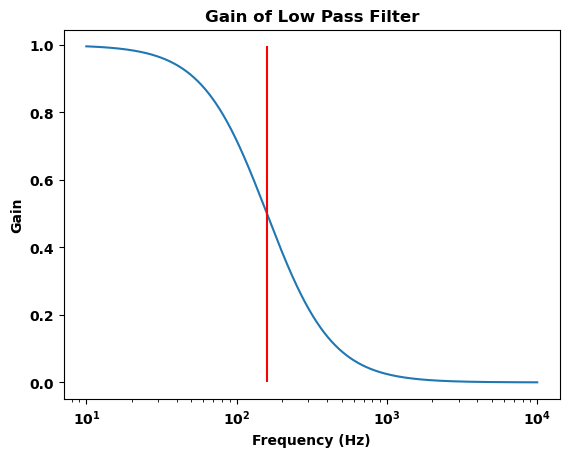

(9.0, 11000.0)

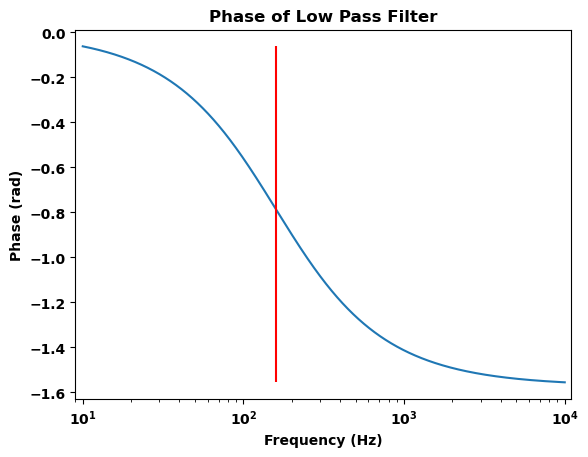

In [6]:
f = np.linspace(10,10000,1000)
R=1000. # 1kOhm
C=1.e-6  # 1µF
#
# Plot the Gain of the filter, and below it plot the phase of the filter.
# Mark with a vertical red line the cutoff frequency of the filter.
#
# Implement your plots in the space below, using f, R and C
#
# Points = 10
#
# Your code goes here:
f = np.linspace(10, 10000, 100000)
g = Filter(f, 1000, 1e-6)
plt.plot(f, g)
plt.vlines(1/(2*np.pi*R*C), min(g), max(g), colors='red')
plt.xscale("log")
plt.title("Gain of Low Pass Filter")
plt.ylabel("Gain")
plt.xlabel("Frequency (Hz)")
plt.show()
phase = np.angle(g)
plt.plot(f, phase)
plt.xscale("log")
plt.vlines(1/(2*np.pi*R*C), min(phase), max(phase), colors='red')
plt.title("Phase of Low Pass Filter")
plt.ylabel("Phase (rad)")
plt.xlabel("Frequency (Hz)")
plt.xlim(min(f) - 1, 1.1*max(f))

## Make a Bode Plot.

To make this a Bode plot, we would want to plot the y axis as: $$ B=20\log_{10}\left( \left| \frac{V_{out}}{V_{in}}\right|\right)\ [dB]$$, which is the signal in deciBel, or dB. To get our axis in that scale, we want to put the data through this formula.

1. Create a proper Bode plot, with dB on the y-axis.
2. Again indicate the cut-off frequency by a red vertical line.

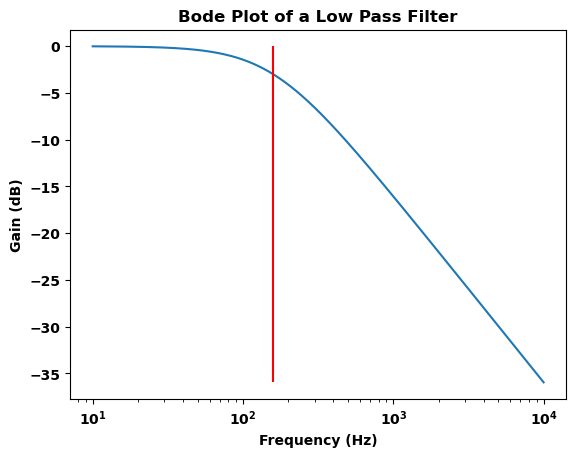

In [7]:
# Make a Bode Plot for the filter.
#
# Points = 10
#
# Your code for the bode plot goes here:
B = 20*np.log10(g)
plt.plot(f, B)
plt.vlines(1/(2*np.pi*R*C), min(B), max(B), colors='red')
plt.xscale("log")
plt.title("Bode Plot of a Low Pass Filter")
plt.ylabel("Gain (dB)")
plt.xlabel("Frequency (Hz)")
plt.show()

# Fourier Analysis of a Filter

Knowing the frequency response of a circuit, begs the question how an actual signal changes when it is passed through this circuit. Here we will answer the question "What would a square wave look like if I send it through this filter?" Once you know how to do this, you can extend it to any input waveform.

To brush up on Fast Fourier Transforms (FFTs), look at the [FFT tutorial notebook](https://github.com/mholtrop/Phys605/blob/master/Python/FFT/FFT%2Bexample1.ipynb). Once you understand the Fourier Theorem, you should have little problem with this filter example.

The "scipy" package contains the FFT code and also has a useful set of tools in "signal". This makes it easier to create a square wave input signal, which I show in the bit of code below.

To get an accurate result with a Fourier Transform, we want to have a relatively large number of cycles to compute over, giving a large number of samples `N`, and a short time step `DT`. To make the image of the signal still understandable for us visually, I plot only a small segment of the signal. You may want to play with these parameters some once you have your FFT output.

Here is 50 ms of a 100 Hz square wave signal.

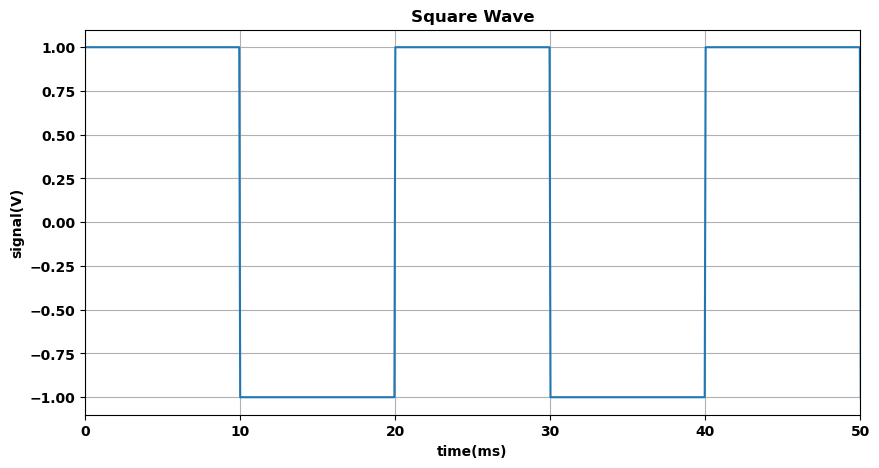

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
F = 50.
T = 2.
N = 2**15                         # You can do FFTs over any number, but 2^N (2**N) is *a lot* faster!
DT = T/N
t = np.linspace(0.,T,N)
y_sq = signal.square(2*np.pi*F*t) # Create a square wave wiht a 2 Volt peak to peak (-1V to +1V)
plt.figure(figsize=(10,5))
plt.plot(1000*t,y_sq)             # Change the x-axis scale to ms by multiplying by 10^3
ax = plt.gca()
ax.set_xlim(0.,50.)               # Show only the first 50 ms of the signal
plt.grid(True)
plt.title("Square Wave")
plt.xlabel("time(ms)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
plt.show()

To see what that signal looks like after our RC Filter, we need to first compute the FFT of our signal. We now essentially have the signal broken down into a very large number of sine waves, all of which need to be added together to give the signal shown above. We do this, because we only could compute what our RC filter does for a *sine* wave at a particular $\omega$, and not any other shape wave. 

#### Task

Make a plot of the *magnitude* (`np.abs()`) of the Fourier Transform of the square wave.

You can compute the FFT with the function `fft` in scipy.fftpack. This takes just one argument, the data input array. However, you will also need the Numpy array of frequecies that correspond to the output Numpy array of `fft()`. A useful function for this is `fftfreq(N,DT)` (in scipy.fftpack), which gets the list of frequencies for an `N` sized FFT that had a delta time of `DT`. Note that an FFT will give both negative and positive frequencies, and that the FFT in general is a complex number, so here you want to plot the complex magnitude. Like in the previous plot, limit the range of the x-axis to make the structure of the plot more visible. Set the range from -2000 Hz to 2000 Hz.

(-2000.0, 2000.0)

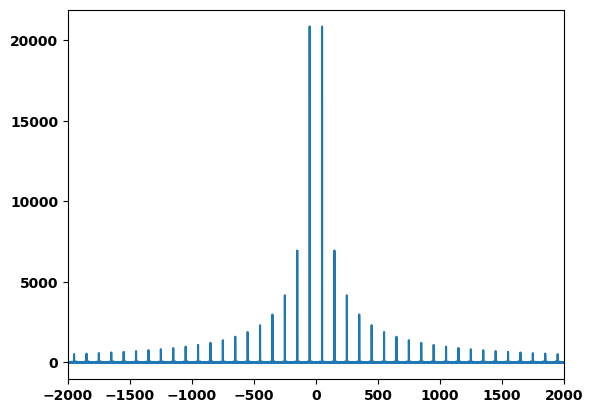

In [9]:
from scipy.fftpack import fft, ifft, fftfreq, fftshift
#
# Your code to plot the FFT goes here.
#
# Points = 5
fourier = fft(y_sq)
freq = fftfreq(N, DT)
plt.plot(freq, np.abs(fourier))
plt.xlim(-2000, 2000)

You should note that the FFT you just plotted is a series of spikes at regular intervals, that start strong (at the fundamental frequency of 50 Hz) and then drop off.

To check the FFT math, you will now want to make sure you can recover the original signal with a *inverse FFT*. This is done with the function `ifft()`.

#### Task

Plot the result of the *real* part of the inverse FFT in the same manner as the previous plot of the square wave. Note that you want to plot the real part here (use `np.real()`) and not the magnitude, which will look quite wrong.

c:\Users\coyne\.conda\envs\physics\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\coyne\.conda\envs\physics\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


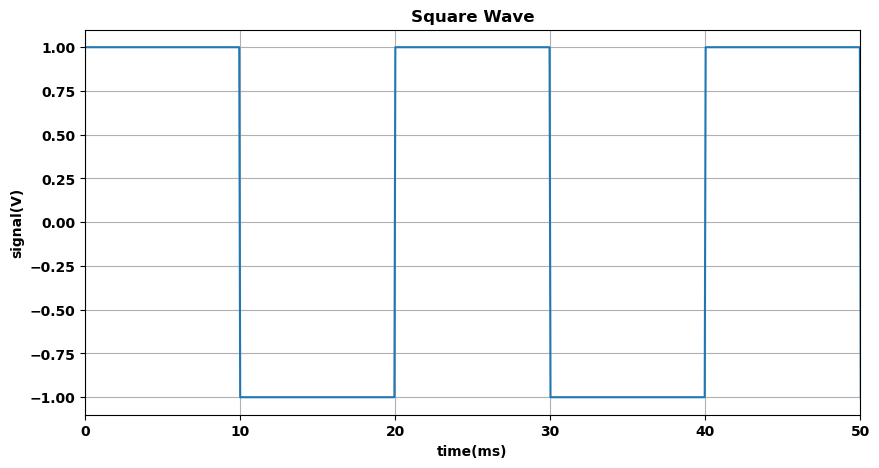

In [10]:
# Put the code for plotting the inverse FFT here.
#
# Points = 5
#
signal = ifft(fourier)
plt.figure(figsize=(10,5))
plt.plot(1000*t, signal)             # Change the x-axis scale to ms by multiplying by 10^3
ax = plt.gca()
ax.set_xlim(0.,50.)               # Show only the first 50 ms of the signal
plt.grid(True)
plt.title("Square Wave")
plt.xlabel("time(ms)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
plt.show()

The plot should look identical to the one before.

## Computing the filtered signal output

You can now compute what the signal would look like if you send it through your filter circuit. To do so, you need to multiply each of the sine waves that the original square wave was build up from with the number you get from the tranfer function ($G(\omega)$ for the RC filter that we computed before. This will give us the output signal in the frequency domain. We then take the reverse FFT, like you just did before, to reconstruct the signal in the time domain, which is the signal after the RC filter as you would see it on a oscilloscope.

#### Task

Compute the output signal of the filter in the frequency domain, and then do an inverse Fourier transform to compute the output signal in the time domain.

Note that for Numpy arrays, $A*B$ is the sequential multiplication of each element of array $A$ with the corresponding element of array $B$, which is exactly what we want here. Check that this output indeed corresponds with what you saw on the oscilloscope in the lab.

In [11]:
# Compute the output of the filter in the frequency domain and store the result in the
# variable y_sq_fft_out
#
# Points = 10
#
# Your code goes here:
gain = Filter(freq, R, C)
y_sq_fft_out = fourier * gain

In [12]:
#
# Run this code to check if the output of your previous step is correct.
#
if len(y_sq_fft_out) == 32768:
    assert np.abs(np.real(y_sq_fft_out[0]) - 2.) < 1E-6
    assert np.abs(np.imag(y_sq_fft_out[0]) ) < 1E-6
    assert np.abs(np.max(y_sq_fft_out.real) - 32.216688 ) < 1E-6
    assert np.abs(np.max(y_sq_fft_out.imag) - 19043.36937828 ) < 1E-6
else:
    print(f"These tests will not work properly if you changed N. You have N={N}")

In [13]:
# Compute the inverse Fourier Transform to get your output in the time domain.
# I.e. compute the inverse Fourier Transform of the y_sq_fft_out array.
#
# Points = 10
#
# Your code goes here:
y_sq_out = ifft(y_sq_fft_out)

In [14]:
#
# Run this code to check if the output of your previous step is correct.
#
if len(y_sq_out) == 32768:
    assert np.abs(np.real(y_sq_out[22]) - 0.52379948) < 1E-6
    assert np.abs(np.real(y_sq_out[150]) - 0.99942888649 ) < 1E-6
    assert np.abs(np.max(y_sq_out.real) - 1.007238848835134 ) < 1E-6
    assert np.abs(np.max(y_sq_out.imag) ) < 1E-5
else:
    print(f"These tests will not work properly if you changed N. You have N={N}")

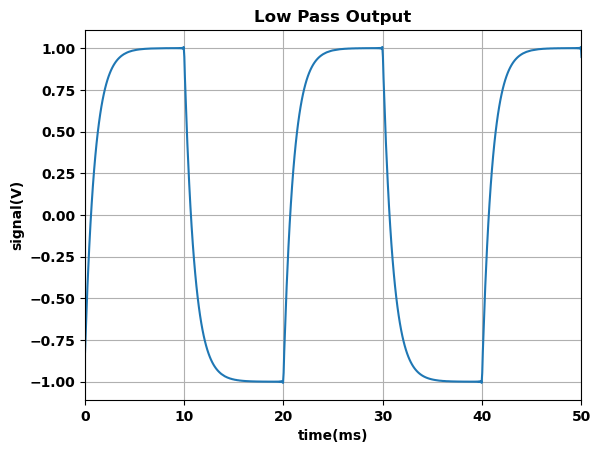

In [15]:
#
# Plot the output wave, after the low pass filter.
#
# Points = 10
plt.plot(1000*t, y_sq_out)             # Change the x-axis scale to ms by multiplying by 10^3
ax = plt.gca()
ax.set_xlim(0.,50.)               # Show only the first 50 ms of the signal
plt.grid(True)
plt.title("Low Pass Output")
plt.xlabel("time(ms)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
plt.show()


The plot you get should look like the one you had for the low pass filter in the lab.

# High Pass Filter

You now want to repeat this entire calculation, but for a high pass filter. You can copy an paste most of the code that you have for the low pass filter, the only thing you need to change is the filter function, `Filter(f, R, C)` to be correct for a high pass filter.

In [16]:
# Put the code for a High pass filter function below
#
# Points = 10
#
def Filter(f,R,C):                      
    w = 2*np.pi*f
    return (1j*w*R*C)/(1j*w*R*C + 1)

In [17]:
# Tests for your function by running these statements. Any error indicates your function
# does not have the expected output.
#
assert np.abs(Filter(100., 1000., 1E-9) - (3.947840e-07+0.000628318j)) < 1E-6
assert np.abs(Filter(100.E3, 1000., 1E-9) - (0.28304319967510216+0.45047724336838857j))  < 1E-6

c:\Users\coyne\.conda\envs\physics\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


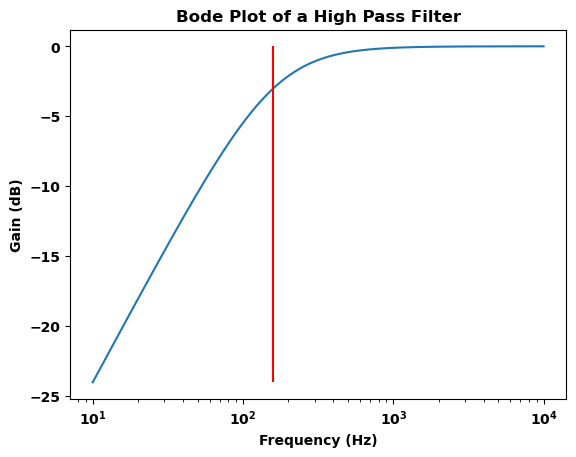

In [18]:
# Put the code for make a Bode plot here.
# Make a Bode Plot for the filter.
#
# Points = 10
#
# Your code for the bode plot goes here:
g = Filter(f, 1000, 1e-6)
B = 20*np.log10(g)
plt.plot(f, B)
plt.vlines(1/(2*np.pi*R*C), min(B), max(B), colors='red')
plt.xscale("log")
plt.title("Bode Plot of a High Pass Filter")
plt.ylabel("Gain (dB)")
plt.xlabel("Frequency (Hz)")
plt.show()

c:\Users\coyne\.conda\envs\physics\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\coyne\.conda\envs\physics\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


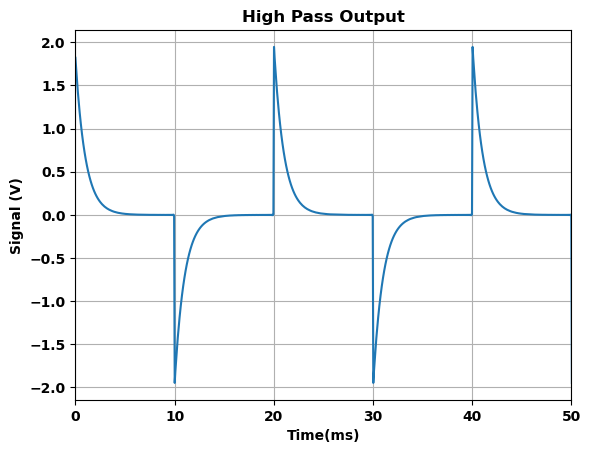

In [25]:
# Put the code for doing the Fourier transform of a square wave, the filter step, and the 
# inverse Fourier transform here. Then add the code to plot the result.
#
# Points = 10
#
gain = Filter(freq, 1000, 1e-6)
y_sq_fft_out = fourier * gain
y_sq_out = ifft(y_sq_fft_out)
plt.plot(1000*t, y_sq_out)             # Change the x-axis scale to ms by multiplying by 10^3
ax = plt.gca()
ax.set_xlim(0.,50.)               # Show only the first 50 ms of the signal
plt.grid(True)
plt.title("High Pass Output")
plt.xlabel("Time(ms)",position=(0.95,1))
plt.ylabel("Signal (V)",position=(1,0.9))
plt.show()

Again, the result should look as it did when you did this experiment in the lab.

## Experiment.

You can now experiment a bit with the parameters that were used in this notebook and get different effects. 

Note how you get some *artifacts* in the output if you reduce the number of points in the FFT. Those artifacts are *similar* to the artifacts you see on a digital scope with a limited sampling frequency. Very expensive digital scopes overcome this by having larger buffers and higher sampling frequencies. 

You can now also change the parameters of your filter, try different values of $R$ and $C$. If you take values that are too low or too high, the simulation will become unrealistic compared to an actual circuit on a breadboard, due to other effects (parasitic capacitance and resistance) on the breadboard that are not included in your simulation.

Check the documentation of scipy.signal and you can try other waveform shapes.